# 実習09-1_画像認識1：CNNを使用した画像分類

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


画像を使用するAIでは、単純な機械学習やニューラルネットワークよりも、周囲のピクセルとの関係を考慮して処理を行う、畳み込みニューラルネットワーク（CNN）を用いる方が一般的である。

ここでは、モデルを簡単なCNNで構成し、基本的な画像分類について学習する。
fashion mnistを使用して練習し、最終的にはmnistを使用した手書き数字の認識に挑戦する。

**可能ならランタイムをGPUにしておくと学習が速いかもしれない。**

## 1. fasion mnistを利用した画像分類（練習用）

### 1-1. データセットの準備
今回は、Kerasに用意されているfashion mnistのデータセットを使用する。
```
# fashion_mnistのデータをロード
from tensorflow.keras import datasets
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()
```
※初めから訓練用とテスト用に分かれてロードされるので、train_test_splitなどは不要

In [2]:
# fashion_mnistのデータをロード
from tensorflow.keras import datasets
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

訓練用画像データの形状を確認してみる。
```
# 形状の確認
train_images.shape
```
出力は(個数、縦、横)

In [3]:
# 形状の確認
train_images.shape

(60000, 28, 28)

train_imagesの最初のデータを確認してみよう。
```
# データの中身を確認
train_images[0]
```

In [4]:
# データの中身を確認
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

各ピクセルの値が0-255の範囲になっているので、0-1の範囲に正規化する。
```
# 正規化（範囲を変更するには？）
train_images =
test_images =
```

In [5]:
# 正規化
train_images = train_images / 255.0
test_images = test_images / 255.0

最初のラベルを表示して確認してみる。ラベルは0～9の数値になっている。
```
train_label[0]
```

In [6]:
# 最初のラベルを表示して確認
train_labels[0]

9

実際に画像としていくつか表示してみる。
```
# 番号と名前の対応（fashion_mnistの場合）
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 表示して確認
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
```


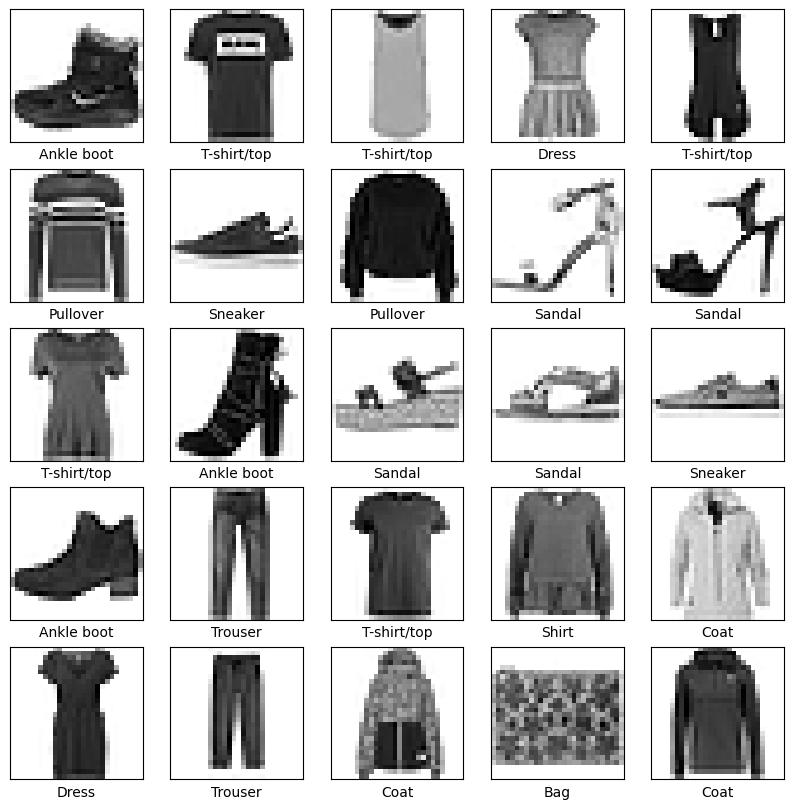

In [7]:
# 番号と名前の対応（fashion_mnistの場合）
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 表示して確認
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

モノクロ画像のデータをCNNに入力する場合は、カラー画像に対応するため、チャンネル方向（RGBなど）への次元を追加する必要がある。
```
# CNNに入力するため入力に次元を追加（最後に1を入れる）
train_images_re = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images_re = test_images.reshape(test_images.shape[0], 28, 28, 1)
```


In [8]:
# CNNに入力するため入力に次元を追加
train_images_re = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images_re = test_images.reshape(test_images.shape[0], 28, 28, 1)

Kerasを使用して多値分類をする場合、カテゴリ変数は、基本的にOnehot Encodingが必要である。方法は何通りかあるが、ここではpandasを使用して出力ラベルを変換する。
```
# 出力ラベルをone-hot encoding(pandas使用の場合, 0 or 1にする場合)
import pandas as pd
train_labels_enc = pd.get_dummies(train_labels, dtype=int).values
test_labels_enc = pd.get_dummies(test_labels, dtype=int).values
```

In [9]:
# 出力ラベルをone-hot encoding
import pandas as pd
train_labels_enc = pd.get_dummies(train_labels, dtype=int).values
test_labels_enc = pd.get_dummies(test_labels, dtype=int).values

In [10]:
# 最初のラベルを表示して確認してもよい
train_labels_enc[0],test_labels_enc[0]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]))

### 1-2. モデル作成
Sequential()を使用してモデルを作成する。今回は、畳み込み（Conv2D）、最大プーリング（MaxPooling）を1回行った後、1次元に変換し全結合層（Dense）に入力する。
今回は、10クラス分類問題なので、出力層のノード数と活性化関数を適切に指定すること。

```
# 必要な物をインポート
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# 作成は別の書き方でもOK
model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten()) # 1次元にする
model.add(Dense(64, activation="relu"))
model.add(Dense(ノード数, activation="活性化関数")) # 出力層。10クラス分類なのでノード数と活性化関数は？
```

In [11]:
# 必要な物をインポート
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# 作成は別の書き方でもOK
model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

summaryで形状を確認する。
```
model.summary()
```

In [12]:
# summaryで確認
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         346,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

損失関数、最適化アルゴリズム、メトリクスを指定してコンパイルする。
```
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
```

In [13]:
# コンパイル
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

### 1-3. 学習

fitで学習する。この時、テストデータも同時に入力しておくと、各エポックで学習終了時のテストデータに対するlossとmetricsも表示される。

**入力は正規化済みのもの（～_re）、出力はダミー変数化後（～_enc）を指定すること。**

```
# fitで学習し、その結果を変数に入れておく（同時にエポックごとの検証もする）
hist = model.fit(train_images_re, train_labels_enc, validation_data=(test_images_re, test_labels_enc), epochs=10)
```

In [14]:
# fitで学習し、その結果を変数に入れておく（同時にエポックごとの検証もする）
hist = model.fit(train_images_re, train_labels_enc, validation_data=(test_images_re, test_labels_enc), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8067 - loss: 0.5527 - val_accuracy: 0.8781 - val_loss: 0.3273
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8979 - loss: 0.2820 - val_accuracy: 0.8952 - val_loss: 0.2969
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9131 - loss: 0.2377 - val_accuracy: 0.8975 - val_loss: 0.2883
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9269 - loss: 0.1987 - val_accuracy: 0.9061 - val_loss: 0.2555
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9370 - loss: 0.1764 - val_accuracy: 0.9100 - val_loss: 0.2554
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9441 - loss: 0.1520 - val_accuracy: 0.9056 - val_loss: 0.2692
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9517 - loss: 0.1291 - val_accuracy: 0.9141 - val_loss: 0.2540
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9574 - loss: 0.1181 - 

### 1-4. テスト、判断

学習の過程と結果をグラフ化する。
まずはグラフ化のための準備をする。
```
import matplotlib.pyplot as plt

# 後のために、グラフを表示する関数を作成しておく
def plot_graphs(hist, metric):

  # ----------------------------
  # 各epochでの誤差と精度を取得
  # ----------------------------
  met      = hist.history[     metric ]
  val_met  = hist.history[ 'val_'+metric ]
  loss     = hist.history[    'loss' ]
  val_loss = hist.history['val_loss' ]

  epochs   = range(len(met)) # Get number of epochs

  # ---------------------------------------------
  # エポック数に対する誤差を表示（片対数グラフ）
  # --------------------------------------------
  plt.plot  ( epochs,     loss, label='loss')
  plt.plot  ( epochs, val_loss, label='val_loss')
  plt.title ('Training and validation loss'   )
  plt.legend()
  plt.yscale('log')
  plt.figure()
  plt.show()

  # ------------------------------------------------
  # エポック数に対する精度を表示
  # ------------------------------------------------
  plt.plot  ( epochs,     met, label='met' )
  plt.plot  ( epochs, val_met, label='val_met')
  plt.title ('Training and validation metric value')
  plt.legend()
  plt.figure()
  plt.show()
```

In [15]:
# このまま実行する
import matplotlib.pyplot as plt

# 後のために、グラフを表示する関数を作成しておく
def plot_graphs(hist, metric):

  # ----------------------------
  # 各epochでの誤差と精度を取得
  # ----------------------------
  met      = hist.history[     metric ]
  val_met  = hist.history[ 'val_'+metric ]
  loss     = hist.history[    'loss' ]
  val_loss = hist.history['val_loss' ]

  epochs   = range(len(met)) # Get number of epochs

  # ---------------------------------------------
  # エポック数に対する誤差を表示（片対数グラフ）
  # --------------------------------------------
  plt.plot  ( epochs,     loss, label='loss')
  plt.plot  ( epochs, val_loss, label='val_loss')
  plt.title ('Training and validation loss'   )
  plt.legend()
  plt.yscale('log')
  plt.figure()
  plt.show()

  # ------------------------------------------------
  # エポック数に対する精度を表示
  # ------------------------------------------------
  plt.plot  ( epochs,     met, label='met' )
  plt.plot  ( epochs, val_met, label='val_met')
  plt.title ('Training and validation metric value')
  plt.legend()
  plt.figure()
  plt.show()

損失関数の値（loss）と正解率（accuracy）をグラフ化して学習結果を視覚的に確認する。
```
# lossはデフォルトで表示するので、accuracyを指定
plot_graphs(hist, 'accuracy')
```

**グラフから分かることはありますか？**

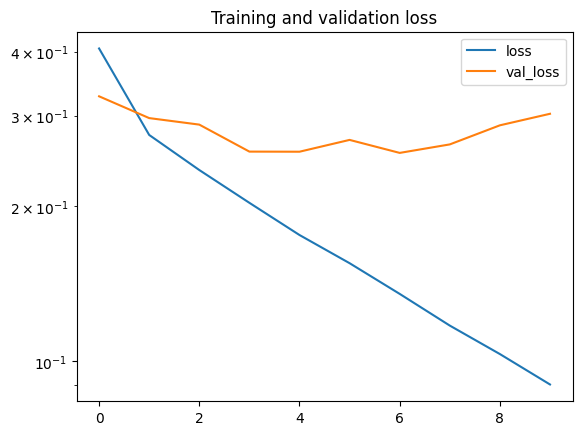

<Figure size 640x480 with 0 Axes>

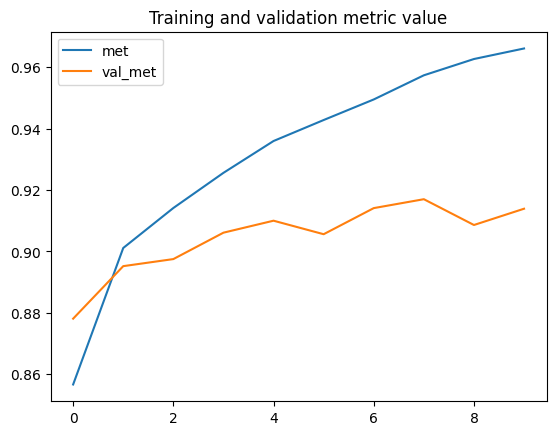

<Figure size 640x480 with 0 Axes>

In [16]:
# 損失関数(loss)と正解率（accuracy）のグラフ化
plot_graphs(hist, 'accuracy')

predictを使用し、予測結果を確認する。
```
model.predict(test_images[:1])
```
**【課題】表示される数値は何を表していますか？ここから、予測結果をどう判断すればよいですか？**

**【回答】**
モデルが各クラスに属する可能性を示す確率値

In [17]:
# predictで予測
model.predict(test_images[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


array([[7.4189792e-09, 5.0469481e-13, 1.8226857e-09, 5.3354963e-11,
        1.0629113e-10, 1.1254266e-05, 5.3868421e-10, 4.5357203e-05,
        1.2451022e-08, 9.9994338e-01]], dtype=float32)

## 2. mnistを利用した画像分類（実習用）

### 2-1. データセットの準備
データセットには、手書きの「0」から「9」の画像を扱うmnistを使用する。
```
# mnistのデータをロード
# 練習用のfashion_mnistをmnistに変更すればOK
```

In [18]:
# mnistのデータをロード
from tensorflow.keras import datasets
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [29]:
# 最初のデータ（数値画像データ）を表示して確認
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [20]:
# 正規化
train_images = train_images / 255.0
test_images = test_images / 255.0

In [30]:
# 表示して確認　＝＞　class_namesは不要、plt.xlabelにはtrain_labels[i]を直接入れる
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_images[i])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [31]:
# CNNに入力するため入力に次元を追加
train_labels_enc = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_labels_enc = test_images.reshape(test_images.shape[0], 28, 28, 1)

出力ラベルは0-9の数値なので、Onehot Encodingする。

In [32]:
# 出力ラベルをone-hot encoding
train_labels_enc[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

### 2-2. モデル作成
mnistとfashion_mnistは画像サイズなども同じなので、練習用と同じモデルでよい。

In [35]:
# モデル作成
model = Sequential([
  Input(shape=(28,28,1)),
  Conv2D(32, (3, 3), activation='relu'),
  MaxPooling2D((2, 2)),
  Flatten(),
  Dense(64, activation="relu"),
  Dense(10, activation="softmax")
])
# 作成は別の書き方でもOK


In [36]:
# summaryで確認
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         346,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# コンパイル
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

### 2-3. 学習

fitで学習しつつ、テストデータでlossとmetricsを確認する。

In [39]:
# fitで学習しつつテストデータで検証
hist = model.fit(train_images_re, train_labels_enc, validation_data=(test_images_re, test_labels_enc), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2830 - loss: 2.0086 - val_accuracy: 0.0967 - val_loss: 2.5216
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3091 - loss: 1.9426 - val_accuracy: 0.0944 - val_loss: 2.5808
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3304 - loss: 1.8876 - val_accuracy: 0.0981 - val_loss: 2.6509
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3562 - loss: 1.8274 - val_accuracy: 0.0994 - val_loss: 2.7443
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3820 - loss: 1.7623 - val_accuracy: 0.0986 - val_loss: 2.7997
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4034 - loss: 1.7075 - val_accuracy: 0.1049 - val_loss: 2.8630
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.4234 - loss: 1.6504 - val_accuracy: 0.0991 - val_loss: 2.9156
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4439 - loss: 1.5978 - 

### 2-4. テスト、判断

損失関数の値（loss）と正解率（accuracy）をグラフ化して学習結果を視覚的に確認する。

余裕があれば、モデルの構成やエポック数を調整して、過学習が起こらないようにする。

**【課題】グラフから分かることはありますか？**

**【回答】**
モデルの学習や過学習の様子

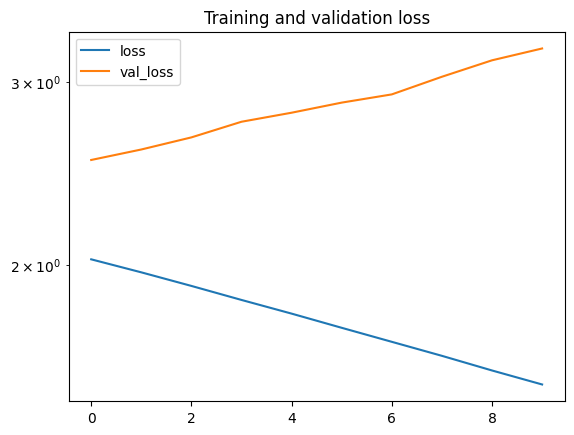

<Figure size 640x480 with 0 Axes>

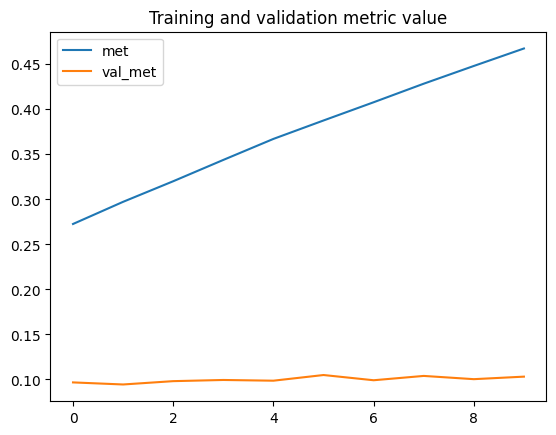

<Figure size 640x480 with 0 Axes>

In [40]:
# 損失関数(loss)と正解率（accuracy）のグラフ化
plot_graphs(hist, 'accuracy')

predictを使用し、予測結果を確認する。
```
model.predict(test_images[:1])
```
**【課題】表示される数値は何を表していますか？ここから、予測結果をどう判断すればよいですか？**

**【回答】**
モデルが各クラスに属する可能性を示す確率値

In [41]:
model.predict(test_images[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


array([[0.08516653, 0.02698554, 0.12243022, 0.0134259 , 0.04396509,
        0.17111897, 0.00997351, 0.31126708, 0.15585959, 0.05980751]],
      dtype=float32)

実習が終わったら、以下の記述があることを自分でチェックすること。

*   MNISTのグラフから分かること
*   predictの結果の意味

チェック後に、このファイルをipynbでダウンロードして提出してください。（ダウンロード前にクラス番号氏名を変更すること。）


In [42]:
# 保存したファイルをダウンロード


FileNotFoundError: Cannot find file: 実習09_1_画像分類1（CNN）_Sk3a04ブンカシュン.ipynb